<a href="https://colab.research.google.com/github/wrozal/MIW-pjatk/blob/main/MP3/pro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Graph printing method

In [2]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
                    edgecolor='black')


## 1. Separate the data set into a training and testing subsets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [1, 2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## 2. Check the tree's performance for entropy and Gini coefficient - compare the results and argue the results

##Entropy

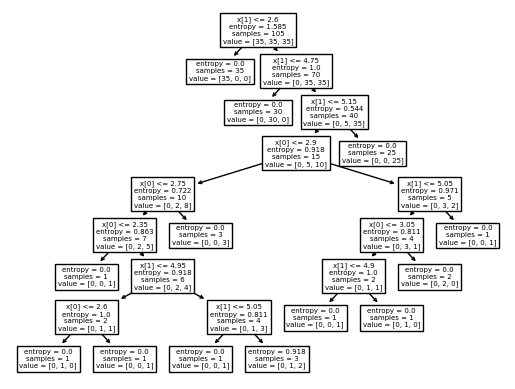

In [4]:
entropy_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=1)
entropy_tree = entropy_tree.fit(X_train, y_train)
tree.plot_tree(entropy_tree)
plt.show()

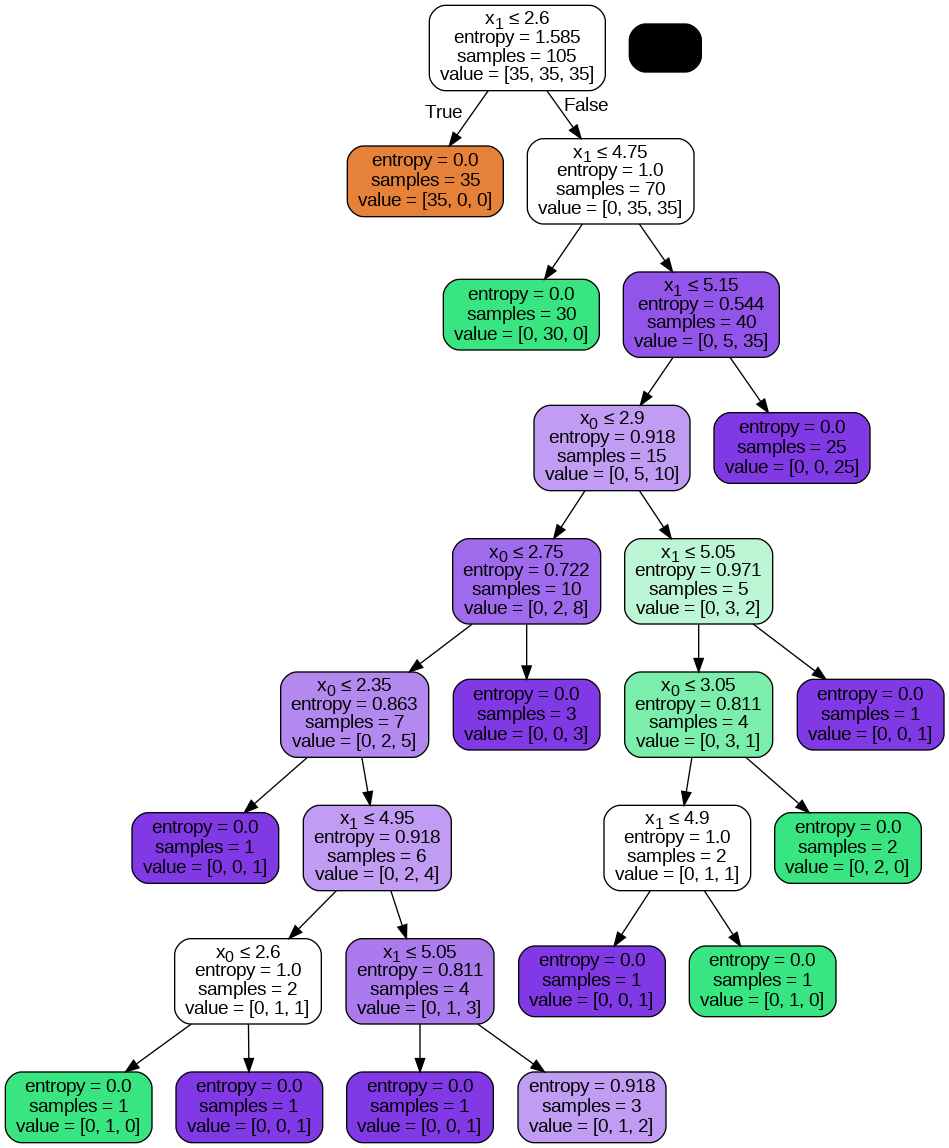

In [5]:
dat = export_graphviz(entropy_tree, out_file=None,
                      filled=True, rounded=True,
                      special_characters=True)

graph = pydotplus.graph_from_dot_data(dat)
graph.write_png('entropyTree.png')
Image(graph.create_png())

<ipython-input-2-93b991f0139e>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
<ipython-input-2-93b991f0139e>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,


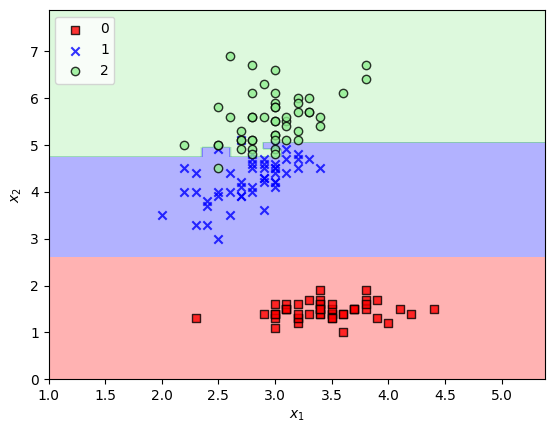

In [6]:
plot_decision_regions(X=X, y=y, classifier=entropy_tree)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

##Gini

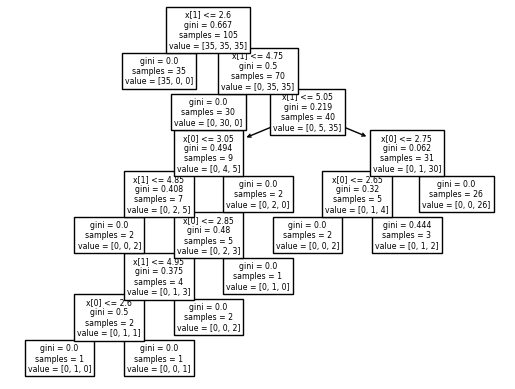

In [7]:
gini_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=1)
gini_tree = gini_tree.fit(X_train, y_train)
tree.plot_tree(gini_tree)
plt.show()

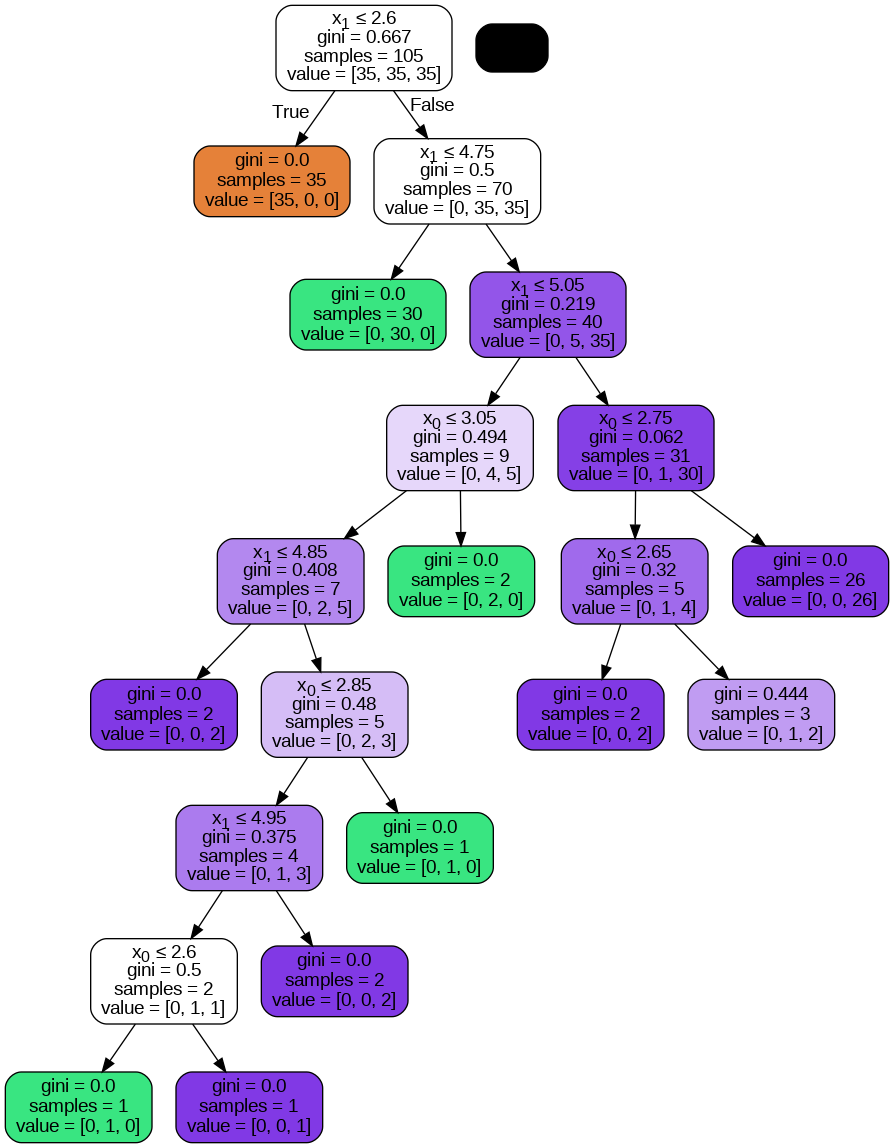

In [8]:
dat = export_graphviz(gini_tree, out_file=None,
                      filled=True, rounded=True,
                      special_characters=True)

graph = pydotplus.graph_from_dot_data(dat)
graph.write_png('giniTree.png')
Image(graph.create_png())

<ipython-input-2-93b991f0139e>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
<ipython-input-2-93b991f0139e>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,


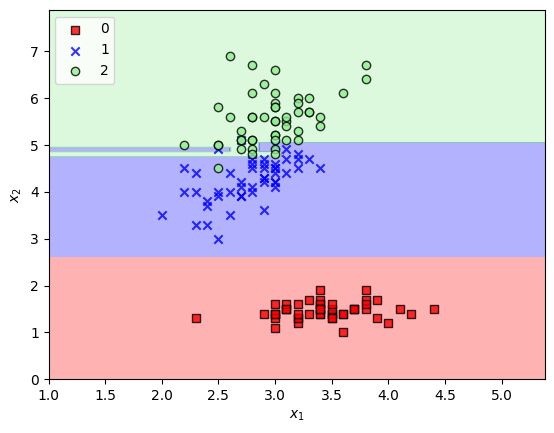

In [9]:
plot_decision_regions(X=X, y=y, classifier=gini_tree)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

In [10]:
y_pred_entropy = entropy_tree.predict(X_test)
y_pred_gini = gini_tree.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Tree accuracy for Entropy: {accuracy_entropy:.3f}")
print(f"Tree accuracy for Gini: {accuracy_gini:.3f}")

Tree accuracy for Entropy: 0.956
Tree accuracy for Gini: 0.933


## 3. Check tree performance for different tree depths - compare results and argue the results

Tree accuracy for depth 2: 0.711
Tree accuracy for depth 3: 0.711
Tree accuracy for depth 4: 0.733
Tree accuracy for depth 5: 0.889
Tree accuracy for depth 6: 0.844
Tree accuracy for depth 7: 0.889
Tree accuracy for depth 8: 0.889
Tree accuracy for depth 9: 0.889
Tree accuracy for depth 10: 0.889


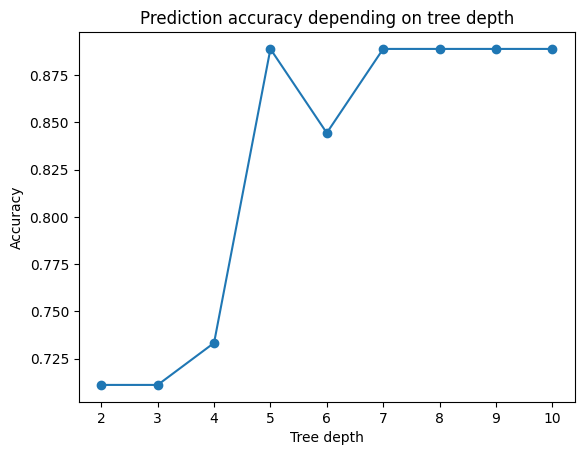

In [11]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = []

for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth, random_state=3, splitter='random')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Tree accuracy for depth {depth}: {accuracy:.3f}")
    
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.title('Prediction accuracy depending on tree depth')
plt.show()

## 4. Test the performance of random forests for a different number of decision trees - compare the results and argue the results

<ipython-input-2-93b991f0139e>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
<ipython-input-2-93b991f0139e>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,


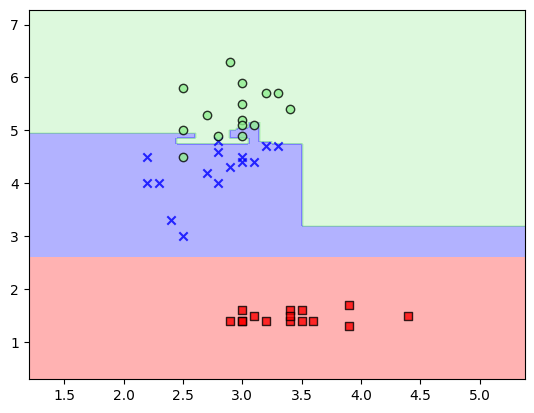

A random forest with 5 trees has an accuracy of 0.911


<ipython-input-2-93b991f0139e>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
<ipython-input-2-93b991f0139e>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,


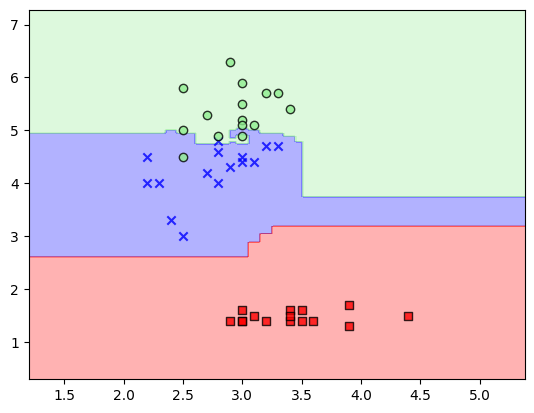

A random forest with 10 trees has an accuracy of 0.956


<ipython-input-2-93b991f0139e>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
<ipython-input-2-93b991f0139e>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,


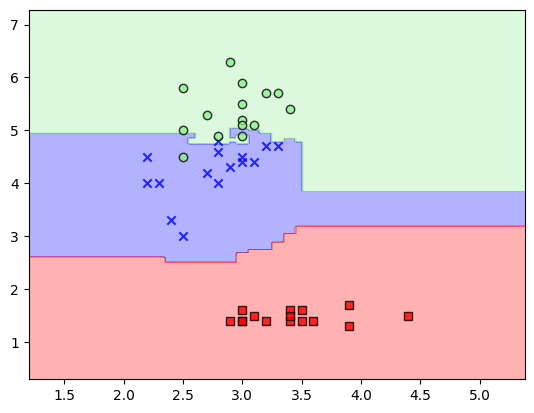

A random forest with 20 trees has an accuracy of 0.956


<ipython-input-2-93b991f0139e>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
<ipython-input-2-93b991f0139e>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,


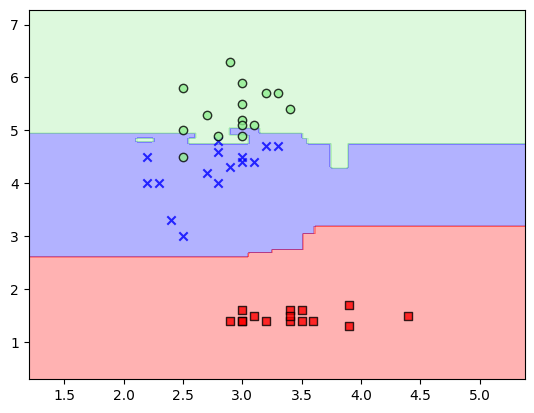

A random forest with 50 trees has an accuracy of 0.956


<ipython-input-2-93b991f0139e>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
<ipython-input-2-93b991f0139e>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,


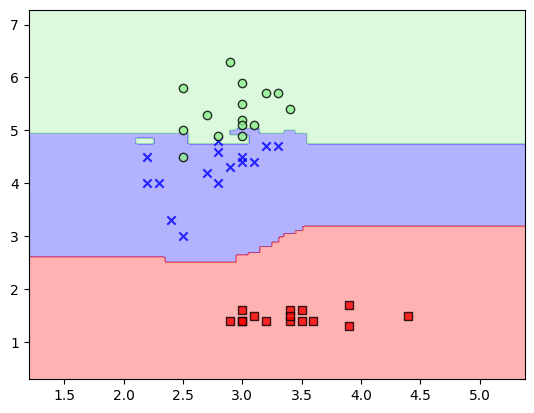

A random forest with 150 trees has an accuracy of 0.956


In [12]:
n_estimators = [5, 10, 20, 50, 150]

for n in n_estimators:
    forest = RandomForestClassifier(criterion='entropy', n_estimators=n, random_state=2)

    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_test)

    plot_decision_regions(X_test, y_test, classifier=forest)
    accuracy = accuracy_score(y_test, y_pred)
    plt.show()

    print(f"A random forest with {n} trees has an accuracy of {accuracy:.3f}")